In [1]:
import matplotlib.pyplot as plt                         #veriyi gorsellestirmek icin
import pandas as pd                                     #verisetini diziye donusturme icin
import seaborn as sns                                   #Grafik cizimi kolerasyon matrisi icin
from sklearn.neighbors import KNeighborsClassifier      #K-nn algoritmasini kullanmak icin
from sklearn.svm import SVC                             #SVM algoritmasi kullanmak icin

from sklearn.model_selection import train_test_split    #veriti egitim ve test gruplarina bolmek icin
from sklearn.metrics import accuracy_score              #agin performans metrigi icin dogruluk skoru

from sklearn.metrics import confusion_matrix            #agin dogru ve yanlis bulma matrisi
from sklearn.metrics import precision_score             #agin basari metrikleri
from sklearn.metrics import recall_score,f1_score       #agin basari metrikleri
from sklearn.metrics import classification_report       #agin basari metrikleri

import warnings
warnings.filterwarnings("ignore")                       #kod icinde kutuphane hatalarini gostermemesi icin

In [2]:
df=pd.read_csv('lenf.csv',delimiter=';')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y1
0,4,6,1,0,0,1,0,1,0,1
1,11,15,1,0,1,1,1,0,0,0
2,7,22,1,0,1,1,1,0,1,0
3,4,11,1,0,1,0,1,1,0,1
4,7,13,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1019,9,6,1,0,1,1,1,1,0,1
1020,1,8,1,1,1,1,1,1,1,1
1021,13,2,1,1,1,0,1,0,1,1
1022,2,78,1,1,0,0,0,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      1024 non-null   int64
 1   X2      1024 non-null   int64
 2   X3      1024 non-null   int64
 3   X4      1024 non-null   int64
 4   X5      1024 non-null   int64
 5   X6      1024 non-null   int64
 6   X7      1024 non-null   int64
 7   X8      1024 non-null   int64
 8   X9      1024 non-null   int64
 9   Y1      1024 non-null   int64
dtypes: int64(10)
memory usage: 80.1 KB


In [4]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y1
X1,1.000000,-0.182657,NaN,-0.101636,0.312180,-0.117323,0.229273,-0.078653,0.067360,0.192375
X2,-0.182657,1.000000,NaN,0.117896,-0.167241,-0.252037,-0.192792,0.108567,0.084564,-0.261570
X3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,-0.101636,0.117896,NaN,1.000000,-0.069097,-0.109664,0.132756,0.149857,0.262694,0.002403
X5,0.312180,-0.167241,NaN,-0.069097,1.000000,0.003479,0.543739,-0.131781,-0.289820,0.324843
X6,-0.117323,-0.252037,NaN,-0.109664,0.003479,1.000000,-0.079033,0.031261,-0.132205,0.012649
X7,0.229273,-0.192792,NaN,0.132756,0.543739,-0.079033,1.000000,-0.215866,-0.251033,0.115174
X8,-0.078653,0.108567,NaN,0.149857,-0.131781,0.031261,-0.215866,1.000000,-0.102401,0.538631
X9,0.067360,0.084564,NaN,0.262694,-0.289820,-0.132205,-0.251033,-0.102401,1.000000,-0.246789
Y1,0.192375,-0.261570,NaN,0.002403,0.324843,0.012649,0.115174,0.538631,-0.246789,1.000000


In [7]:
description=df.describe()
print(description)

                X1          X2      X3           X4           X5           X6  \
count  1024.000000  1024.00000  1024.0  1024.000000  1024.000000  1024.000000   
mean      6.304688     9.34668     1.0     0.443359     0.599609     0.619141   
std       3.895876    14.80700     0.0     0.497024     0.490217     0.485835   
min       1.000000     0.00000     1.0     0.000000     0.000000     0.000000   
25%       4.000000     3.00000     1.0     0.000000     0.000000     0.000000   
50%       6.000000     6.00000     1.0     0.000000     1.000000     1.000000   
75%       7.000000     8.00000     1.0     1.000000     1.000000     1.000000   
max      21.000000    78.00000     1.0     1.000000     1.000000     1.000000   

                X7           X8           X9           Y1  
count  1024.000000  1024.000000  1024.000000  1024.000000  
mean      0.630859     0.639648     0.650391     0.630859  
std       0.482808     0.480337     0.477080     0.482808  
min       0.000000     0.00000

<Axes: >

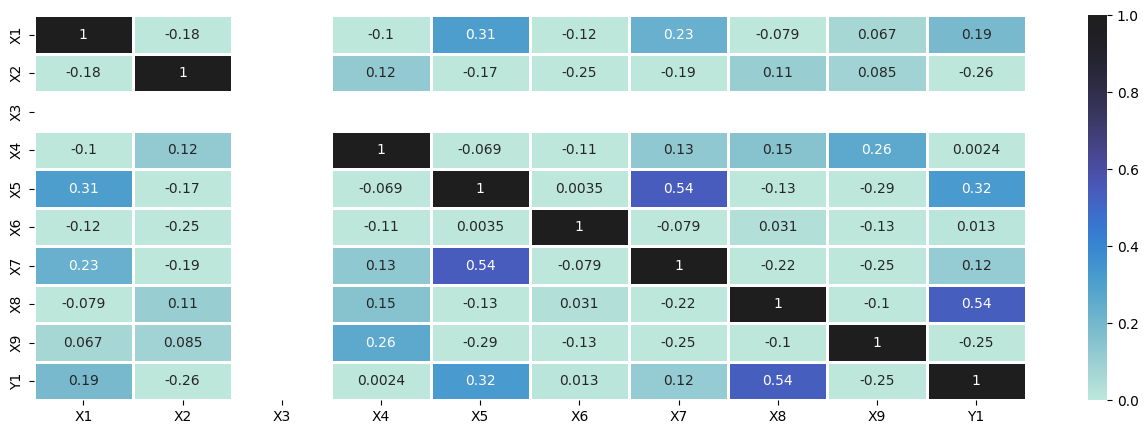

In [9]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True, vmin=0, vmax=1, center=True, linewidths=2)

In [27]:
def svm(X_train, y_train, X_test, y_test):
    svm=SVC(kernel='linear', c=100.0, random_state=35)
    svm.fit(X_train,y_train)
    y_pred=svm.predict(X_test)
    
    print_states_percentage_train_test(svm,y_test,y_pred)
    
    cnf_matrix=confusion_matrix(y_test,y_pred)
    cnf_matrix_t=cnf_matrix.astype(int)
    sns.heatmap(cnf_matrix_t,annot=True,fmt=".0f")
    
    return

svm(X_train_std,y_train,X_test_std,y_test)

NameError: name 'X_train_std' is not defined

In [26]:
svm(X_train_std,y_train,X_test_std,y_test)

NameError: name 'X_train_std' is not defined

In [22]:
def gnb(X_train, y_train, X_test, y_test):
    gnb=GaussianNB(priors=None, var_smoothing=1e-02)
    gnb.fit(X_train,y_train)
    y_pred=gnb.predict(X_test)
    
    print_states_percentage_train_test(svm,y_test,y_pred)
    
    cnf_matrix=confusion_matrix(y_test,y_pred)
    cnf_matrix_t=cnf_matrix.astype(int)
    sns.heatmap(cnf_matrix_t,annot=True,fmt=".0f")
    
    return

gnb(X_train,y_train,X_test,y_test)

In [23]:
gnb(X_train,y_train,X_test,y_test)

NameError: name 'X_train' is not defined